<a href="https://colab.research.google.com/github/rahiakela/nlp-research-and-practice/blob/main/getting-started-with-nlp/02-spam-filtering/spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Spam Filtering

If you want to build a machine-learning classifier for spam detection, you need to provide
your algorithm with a sufficient number of spam and ham emails. 

The best way to
build such a classifier would be to collect your own ham and spam emails and train your algorithm to detect what you personally would consider spam.

##Setup

In [1]:
import os
import codecs
import random

import nltk
from nltk import word_tokenize
from nltk import NaiveBayesClassifier, classify
from nltk.text import Text

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
%%shell

wget https://github.com/rahiakela/nlp-research-and-practice/raw/main/getting-started-with-nlp/datasets/enron1.zip

unzip enron1.zip
rm -rf enron1.zip

##Step 1: Define the data and classes

In [4]:
def read_in(folder):
  files = os.listdir(folder)
  a_list = []
  for a_file in files:
    # skip hidden files
    if not a_file.startswith("."):
      # Read the contents of each files
      f = codecs.open(folder + a_file, "r", encoding="ISO-8859-1", errors="ignore")
      a_list.append(f.read())
      f.close()
  return a_list

In [5]:
# verify that the data is uploaded and read in correctly
spam_list = read_in("enron1/spam/")
print(len(spam_list))
print(spam_list[0])

1500
Subject: hp psc 1315 all - in - one@ $69. 00
Hp psc 1315
All - in - one
Printer, scanner, copier
$69. 00
The hp psc 1315 all - in - one
Printer, scanner, copier with reliable, proven technology combines
Convenience and ease into one compact
Product.
* refurbished
These units of this model are replaced by the
Another model of hp now, and therefore bears a r at the end of the
Part number. Warranty is one year.
Visit: http:// www. Computron - me. Com for deals
!
Your one stop/office #td
01, jebel alI duty free zonedubai, uae. Www. Computron - me. Com
For latest clearance sale listing contact our
Sales department.
For further details please send
Your enquiries to: dealers@ emirates. Net. Aeor contact via www. Computron - me. Com
Compaq
Hewlett packard
3 com
Dell
Intel
Iomega
Epson
Aopen
Creative
Toshiba
Apc
Cisco
Us
Robotics
Microsoft
Canon
Intellinet
Targus
Viewsonic
Ibm
Sony
- - - - - - - and lots more
!!!
If you have any
Complaints/suggestions contact: customerservice@ computron - 

In [6]:
ham_list = read_in("enron1/ham/")
print(len(ham_list))
print(ham_list[0])

3672
Subject: re: gas nom' s
We' ve talked this over at this end and agree we should be taking the following approach:
Remind brazos that under exhibit 7. 12, page 2 of the ppa, brazos is precluded on any gas day from taking a greater volume of gas than the plant' s mdq (45, 000 dth/d) less the amount needed to satisfy its generation request.
The partnership will accept total gas nominations as generation first, gas for resale second. If brazos' electric nominations by hour would, given ambient conditions, cause us to use at or above the plant' s mdq under its contracts with apache/williams (45, 000 dth/d), gas nominations will be zero. This needs to be handled between the operators. I' ve emphasized" at or above" on purpose; if an all electric nomination would cause brazos to burn in excess of 45, 000 dth per day, we will honor that request (we' re looking at this with the attorneys and may choose at a future date to change the way this has been administered in the past, as this situa

In [7]:
random.seed(42)

# combine the data into a single structure
all_emails = [(email_content, "spam") for email_content in spam_list]
all_emails += [(email_content, "ham") for email_content in ham_list]

random.shuffle(all_emails)
print(f"Dataset size = {str(len(all_emails))} emails")

Dataset size = 5172 emails


##Step 2: Split the text into words

In [8]:
# run a tokenizer over text
def tokenize(input):
  word_list = []
  for word in word_tokenize(input):
    word_list.append(word)
  return word_list

In [9]:
input = "What's the best way to split a sentence into words?"
print(tokenize(input))

['What', "'s", 'the', 'best', 'way', 'to', 'split', 'a', 'sentence', 'into', 'words', '?']


In [10]:
def tokenize(input):
  word_list = [word for word in word_tokenize(input)]
  return word_list

In [11]:
input = "What's the best way to split a sentence into words?"
print(tokenize(input))

['What', "'s", 'the', 'best', 'way', 'to', 'split', 'a', 'sentence', 'into', 'words', '?']


##Step 3: Extract and normalize the features

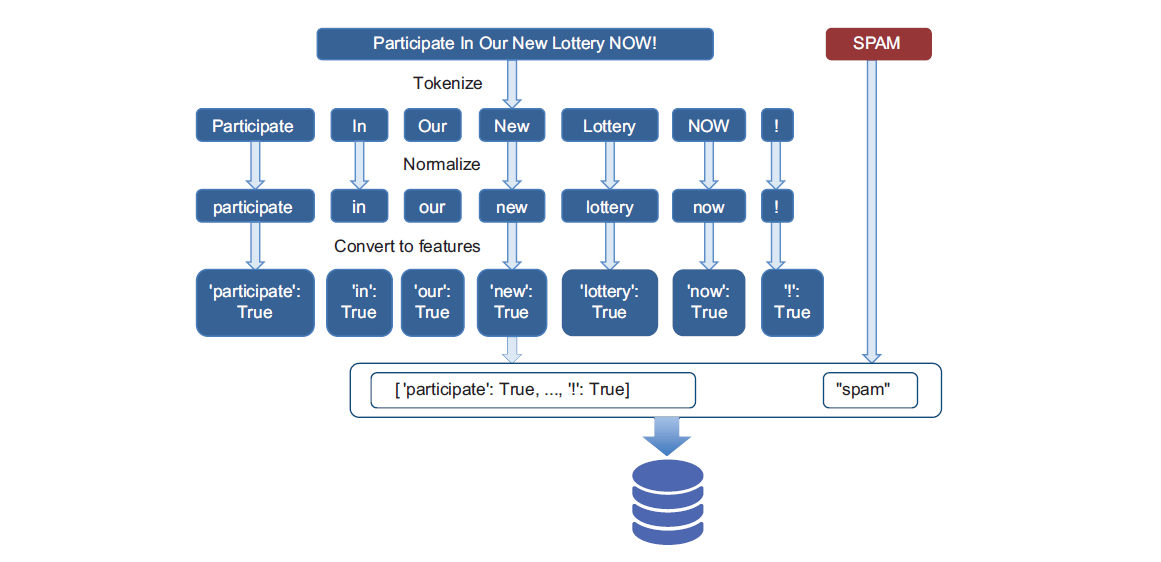

In [12]:
# Let’s define a function that will extract the features from the text input
def get_features(text):
  word_list = [word for word in word_tokenize(text.lower())]
  features = {word: True for word in word_list}
  return features

# Preprocess the texts by tokenising them and removing the stopwords
all_features = [(get_features(email), label) for (email, label) in all_emails]

print(get_features("Participate In Our New Lottery NOW!"))
print(len(all_features))
print(len(all_features[0][0]))
print(len(all_features[99][0]))

{'participate': True, 'in': True, 'our': True, 'new': True, 'lottery': True, 'now': True, '!': True}
5172
625
41


In [13]:
all_features[0]

({'subject': True,
  ':': True,
  'sterling': True,
  'balance': True,
  'sheet': True,
  'strengthens': True,
  'underpriced': True,
  'stock': True,
  'now': True,
  'that': True,
  'oil': True,
  'and': True,
  'gas': True,
  'has': True,
  'entered': True,
  'a': True,
  'long': True,
  '-': True,
  'term': True,
  'bull': True,
  'market': True,
  ',': True,
  'our': True,
  'speciaity': True,
  'in': True,
  'pinpointing': True,
  'the': True,
  'hottest': True,
  'companies': True,
  'of': True,
  'few': True,
  'remaining': True,
  'undervalued': True,
  'energy': True,
  'plays': True,
  'produced': True,
  'soaring': True,
  'returns': True,
  '.': True,
  'montana': True,
  'inc.': True,
  '(': True,
  'mogi': True,
  ')': True,
  'to': True,
  'expiore': True,
  'further': True,
  'opportunities': True,
  'aiberta': True,
  'canada': True,
  'is': True,
  'an': True,
  'deveioper': True,
  "'": True,
  's': True,
  'most': True,
  'highly': True,
  'coveted': True,
  'reser

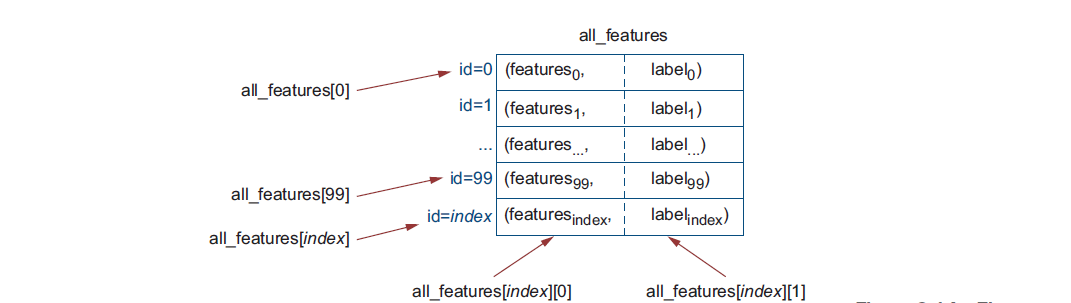

In [14]:
all_features[0][0]

{'subject': True,
 ':': True,
 'sterling': True,
 'balance': True,
 'sheet': True,
 'strengthens': True,
 'underpriced': True,
 'stock': True,
 'now': True,
 'that': True,
 'oil': True,
 'and': True,
 'gas': True,
 'has': True,
 'entered': True,
 'a': True,
 'long': True,
 '-': True,
 'term': True,
 'bull': True,
 'market': True,
 ',': True,
 'our': True,
 'speciaity': True,
 'in': True,
 'pinpointing': True,
 'the': True,
 'hottest': True,
 'companies': True,
 'of': True,
 'few': True,
 'remaining': True,
 'undervalued': True,
 'energy': True,
 'plays': True,
 'produced': True,
 'soaring': True,
 'returns': True,
 '.': True,
 'montana': True,
 'inc.': True,
 '(': True,
 'mogi': True,
 ')': True,
 'to': True,
 'expiore': True,
 'further': True,
 'opportunities': True,
 'aiberta': True,
 'canada': True,
 'is': True,
 'an': True,
 'deveioper': True,
 "'": True,
 's': True,
 'most': True,
 'highly': True,
 'coveted': True,
 'reservoirs': True,
 'with': True,
 'generating': True,
 'potenti

In [15]:
all_features[0][1]

'spam'

##Step 4: Train the classifier

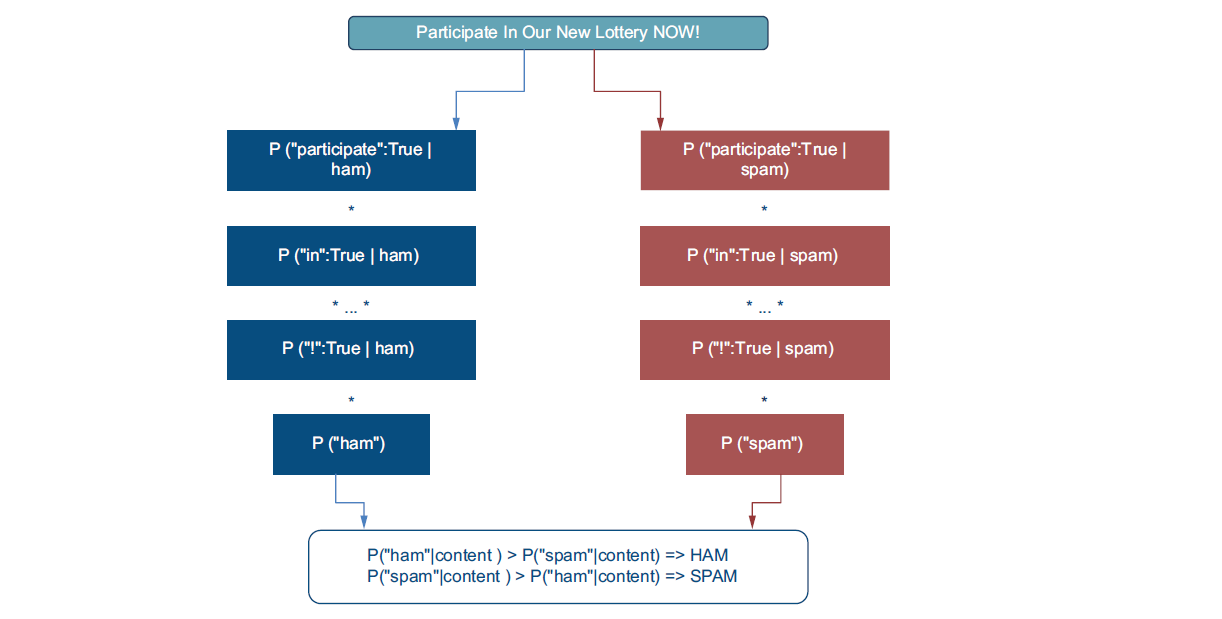

In [16]:
# train a Naïve Bayes classifier
def train(features, proportion):
  train_size = int(len(features) * proportion)
  # initialise the training and test sets
  train_set, test_set = features[: train_size], features[train_size:]
  print(f"Training set size = {str(len(train_set))} emails")
  print(f"Test set size = {str(len(test_set))} emails")

  # train the classifier
  classifier = NaiveBayesClassifier.train(train_set)
  return train_set, test_set, classifier

In [17]:
train_set, test_set, classifier = train(all_features, 0.8)

Training set size = 4137 emails
Test set size = 1035 emails


##Step 5: Evaluate your classifier